# Intro to regression with neural network


In [1]:
import tensorflow as tf
print(tf.__version__)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

2024-02-12 06:40:57.761004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 06:40:57.761065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 06:40:57.816992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 06:40:57.929046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


2024-02-12 06:41:00.215190: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 06:41:00.294568: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 06:41:00.294764: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

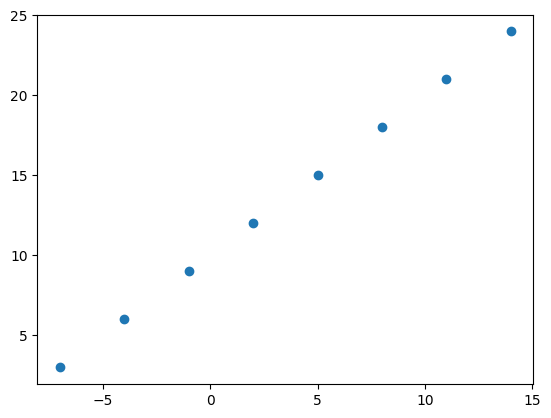

In [2]:
# Creating the data top view and fit
sess = tf.compat.v1.Session(config=config)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inputs and Output Shapes

In [4]:
#Demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2024-02-12 06:41:00.848615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 06:41:00.848815: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 06:41:00.848946: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[0].ndim

0

In [8]:
#Turn our Numpy arrays into Tensors

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

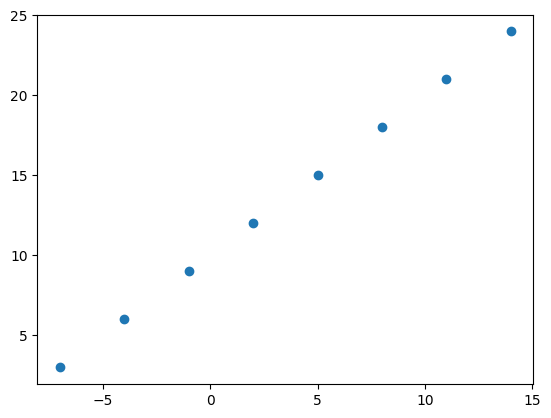

In [10]:
plt.scatter(x, y)

In [11]:
# Set seed
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

#mae - Mean Absolute Error
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)


Epoch 1/50
1/1 [==============================] - 1s 587ms/step - loss: 19.7571 - mae: 19.7571
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 19.4758 - mae: 19.4758
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 19.1946 - mae: 19.1946
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 18.9133 - mae: 18.9133
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 18.6321 - mae: 18.6321
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 18.3508 - mae: 18.3508
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 18.0696 - mae: 18.0696
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 17.7883 - mae: 17.7883
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 17.5071 - mae: 17.5071
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 17.2258 - mae: 17.2258
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - lo

2024-02-12 06:41:02.997073: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fba81df1ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-12 06:41:02.997103: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-02-12 06:41:03.020076: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1707720063.052729     480 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 28/50
1/1 [==============================] - 0s 4ms/step - loss: 13.5364 - mae: 13.5364
Epoch 29/50
1/1 [==============================] - 0s 4ms/step - loss: 13.4039 - mae: 13.4039
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 13.2714 - mae: 13.2714
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 13.1389 - mae: 13.1389
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 13.0064 - mae: 13.0064
Epoch 33/50
1/1 [==============================] - 0s 4ms/step - loss: 12.8739 - mae: 12.8739
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 12.7414 - mae: 12.7414
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 12.6089 - mae: 12.6089
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 12.4764 - mae: 12.4764
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 12.3439 - mae: 12.3439
Epoch 38/50
1/1 [==============================] - 0s 3ms/st

In [12]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[12.870395]], dtype=float32)

In [14]:
y_pred = model.predict([14.0])
y_pred

1/1 [==============================] - 0s 35ms/step


array([[10.679443]], dtype=float32)

# Improving our Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 200ms/step - loss: 7.6537 - mae: 7.6537
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5212 - mae: 7.5212
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4738 - mae: 7.4738
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7.440

In [16]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [17]:
y


<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 34ms/step


array([[30.341078]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    #tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50


2024-02-12 06:41:07.774466: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 [==============================] - 0s 477ms/step - loss: 14.2826 - mae: 14.2826
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 13.2705 - mae: 13.2705
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 12.2697 - mae: 12.2697
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 11.2749 - mae: 11.2749
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 10.2788 - mae: 10.2788
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 9.2729 - mae: 9.2729
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 8.2484 - mae: 8.2484
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 7.1971 - mae: 7.1971
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 6.6275 - mae: 6.6275
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 7.1354 - mae: 7.1354
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 7.7555 - mae: 7.7

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 38ms/step


array([[28.39532]], dtype=float32)

# Evaluating a model



In [21]:
#Bigger Data

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [23]:
#visualize
import matplotlib.pyplot as plt


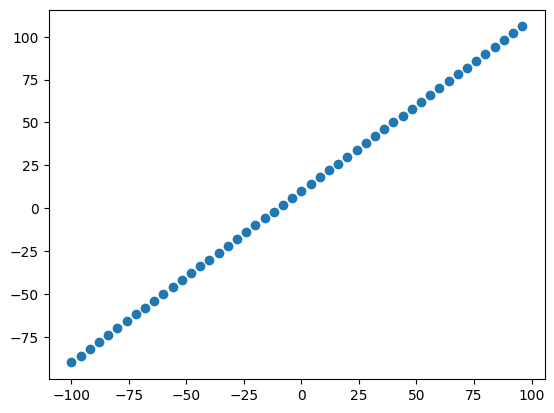

In [24]:
plt.scatter(X, y)

# 3 Sets

In [25]:
len(X)

50

In [26]:
# split the data into train and test data
X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_test)


(40, 10)

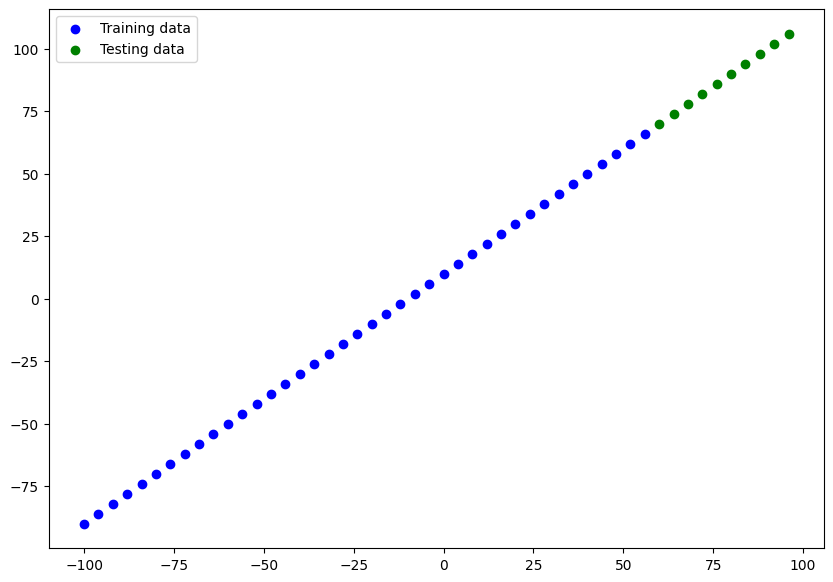

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 78.4215 - mae: 78.4215
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 43.0565 - mae: 43.0565
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 10.6565 - mae: 10.6565
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 9.6080 - mae: 9.6080
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 10.5194 - mae: 10.5194
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 9.7432 - mae: 9.7432
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 8.8350 - mae: 8.8350
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 9.0880 - mae: 9.0880
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 19.3722 - mae: 19.3722
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 10.4754 - mae: 10.4754
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 8.5522

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="TensorFlow_regression")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [114]:
model.summary()

Model: "TensorFlow_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 21.6116 - mae: 21.6116
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 19.1697 - mae: 19.1697
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 12.6200 - mae: 12.6200
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 15.1730 - mae: 15.1730
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 14.2981 - mae: 14.2981
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 11.3367 - mae: 11.3367
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 10.7025 - mae: 10.7025
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 10.6225 - mae: 10.6225
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 39.6914 - mae: 39.6914
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 27.2604 - mae: 27.2604
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss

In [119]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing Model's prediction

In [120]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 12ms/step


array([[62.430813],
       [66.508286],
       [70.58576 ],
       [74.66323 ],
       [78.74071 ],
       [82.818184],
       [86.89565 ],
       [90.97312 ],
       [95.0506  ],
       [99.128075]], dtype=float32)

In [121]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [122]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                    predictions = y_pred,
                    ):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

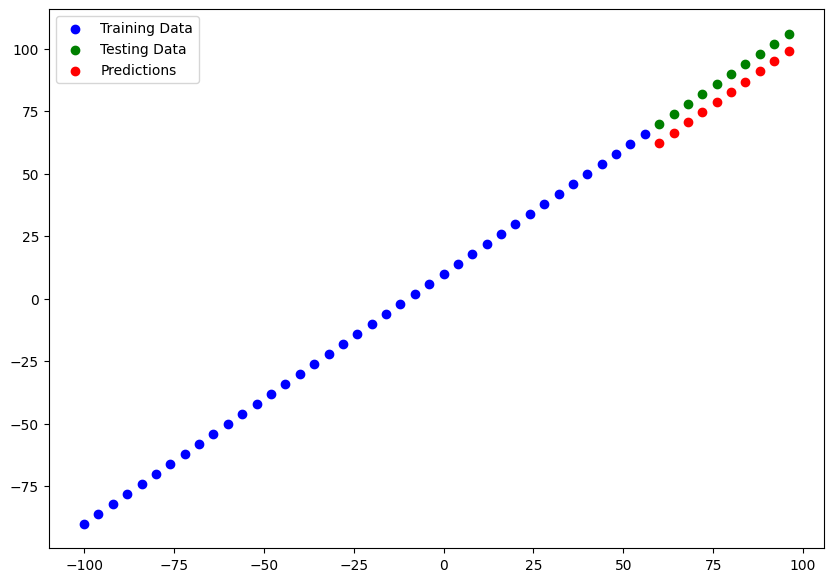

In [123]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred,)

### Evaluating model's predictions with regression evaluation metrics

2 Main metrics:
    1) MAE - Mean Absolute Error, "On avg how wrong is each of my model's predictions"
    2) MSE - Mean Squared Error, "Square the average errors"

In [124]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 80ms/step - loss: 7.2206 - mae: 7.2206


[7.220556735992432, 7.220556735992432]

In [125]:
# Calc MAE

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7.2205567>

In [129]:
# calc MSE

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=52.185963>

In [127]:
#RESHAPE REQ
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([62.430813, 66.508286, 70.58576 , 74.66323 , 78.74071 , 82.818184,
       86.89565 , 90.97312 , 95.0506  , 99.128075], dtype=float32)>

In [128]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [130]:
# Functions to reuse MAE and MSE

def mae(y_true, y_pred):
    mae = tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)
    return mae

def mse(y_true, y_pred):
    mse = tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)
    return mse